In [1]:
import torch
print(torch.__version__)

1.9.0+cu102


### MMDetection 설치

In [2]:
# mmcv 설치
!pip install mmcv-full

     |████████████████████████████████| 317kB 9.6MB/s 
     |████████████████████████████████| 194kB 29.7MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.8-cp37-cp37m-linux_x86_64.whl size=29299249 sha256=917de1607244b1f26a08f81176b7317a8b9475e557e83bf8e4c27fe5eacf22f1
  Stored in directory: /root/.cache/pip/wheels/5a/0d/c3/627bb7a31df052473f9edd2812702d4a0b2e302cb6932c9a91
Successfully built mmcv-full


In [3]:
# mm detection 깃 클론

!git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 19211, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 19211 (delta 63), reused 90 (delta 49), pack-reused 19060
Receiving objects: 100% (19211/19211), 23.50 MiB | 19.66 MiB/s, done.
Resolving deltas: 100% (13462/13462), done.


In [ ]:
!cd mmdetection; python setup.py install

In [1]:
# 아래를 수행하기 전에 kernel을 restart 해야 함. 
from mmdet.apis import init_detector, inference_detector
import mmcv

In [7]:
import matplotlib.pyplot as plt
import cv2

### Fast RCNN Pretrained 모델로 Inference

In [2]:
!cd mmdetection; mkdir checkpoints

In [3]:
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2021-07-05 14:20:30--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.225
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  7.88MB/s    in 22s     

2021-07-05 14:20:54 (7.39 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [4]:
# config 파일을 설정하고, 다운로드 받은 pretrained 모델을 checkpoint로 설정. 
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [5]:
from mmdet.apis import init_detector, inference_detector
# init_detector : pretrained model을 만듬 (config_file / checkpoint_file)을 사용해서
# inference_detector : 모델을 통해 추론 함

model = init_detector(config_file, checkpoint_file, device='cuda:0')

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


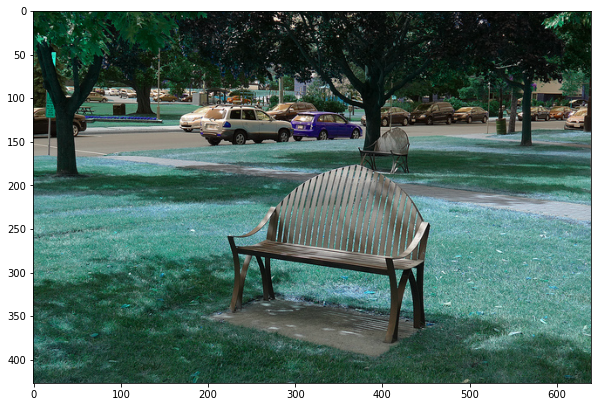

In [74]:
img = cv2.imread('/content/mmdetection/demo/demo.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [75]:
# inference_detector는 인자로 string(file 경로) / ndarray / list 형태 입력가능
# array를 입력할 경우 BGR로 인자를 받고 내부에서 RGB변환해서 결과로 내보냄

pred = inference_detector(model, img)

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


In [12]:
type(pred), len(pred)

(list, 80)

In [13]:
pred

[array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
         1.35454327e-01],
        [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
         8.88783410e-02],
        [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
         7.20723346e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[6.09650024e+02, 1.13805893e+02, 6.34511658e+02, 1.36951904e+02,
         9.88766134e-01],
        [4.81773712e+02, 1.10480980e+02, 5.22459717e+02, 1.30407104e+02,
         9.87157285e-01],
        [1.01822114e+00, 1.12144730e+02, 6.04374733e+01, 1.44173752e+02,
         9.83206093e-01],
        [2.94623718e+02, 1.17035240e+02, 3.78022705e+02, 1.50550873e+02,
         9.71326768e-01],
        [3.96328979e+02, 1.11203323e+02, 4.32490540e+02, 1.32729263e+02,
         9.67802167e-01],
        [5.90976257e+02, 1.10802658e+02, 6.15401794e+02, 1.26493553e+02,
         9.59414959e-01],
        [2.67582001e+02, 1.05686005e+02, 3.28818756

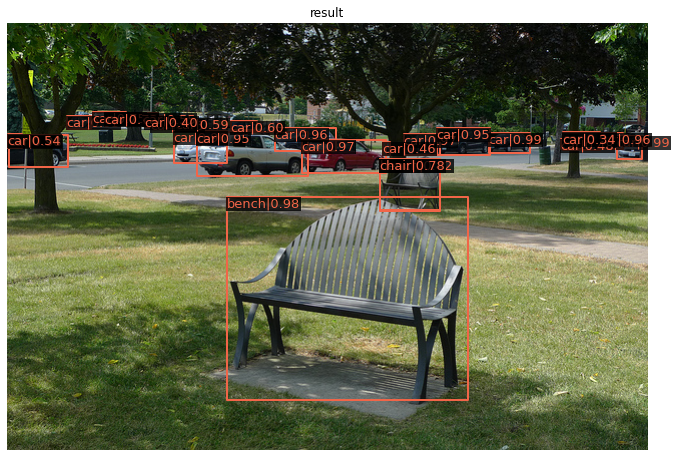

In [76]:
from mmdet.apis import show_result_pyplot
# inference 된 결과를 원본 이미지에 적용하여 새로운 image로 생성(bbox 처리된 image)
# Default로 score threshold가 0.3 이상인 Object들만 시각화 적용. show_result_pyplot은 model.show_result()를 호출. 
show_result_pyplot(model, img, pred)

In [18]:
print(model.cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

### show_result_pyplot 없이 시각화 하기

In [20]:
# 0부터 순차적으로 클래스 매핑된 label 적용. 
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [27]:
# np.where 연습

import numpy as np

arr1 = np.array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
         1.35454759e-01],
        [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
         8.88786465e-01],
        [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
         7.20717013e-02]], dtype=np.float32)

print(arr1.shape)

fil_arr = arr1[np.where(arr1[:,4] > 0.1)]
print(fil_arr.shape)

(3, 5)
(2, 5)


In [71]:
def get_detected_img(model, img_array, score_threshold=0.3, is_print=True):
  img = img_array.copy()
  bbox_color = (0, 255, 0)
  text_color = (0, 0, 255)

  preds = inference_detector(model, img)

  for index, pred in enumerate(preds):
    if len(pred) == 0:
      continue
    
    pred_filtered = pred[np.where(pred[:,4] >= score_threshold)]
    class_name = labels_to_names_seq[index]

    for obj in pred_filtered:
      x1 = int(obj[0])
      y1 = int(obj[1])
      x2 = int(obj[2])
      y2 = int(obj[3])
      
      caption = "{} : {:.4f}".format(class_name, obj[4])
      cv2.rectangle(img, (x1,y1), (x2,y2), color=bbox_color, thickness=2)
      cv2.putText(img, caption, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, text_color, 1)

      if is_print:
        print(caption)
  
  return img

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


car : 0.9888
car : 0.9872
car : 0.9832
car : 0.9713
car : 0.9678
car : 0.9594
car : 0.9593
car : 0.9568
car : 0.9510
car : 0.9458
car : 0.9440
car : 0.9331
car : 0.8663
car : 0.8268
car : 0.7535
car : 0.7166
car : 0.6008
car : 0.5920
car : 0.5540
car : 0.5435
car : 0.4768
car : 0.4612
car : 0.4010
car : 0.3439
bench : 0.9778
bench : 0.4170
chair : 0.7779


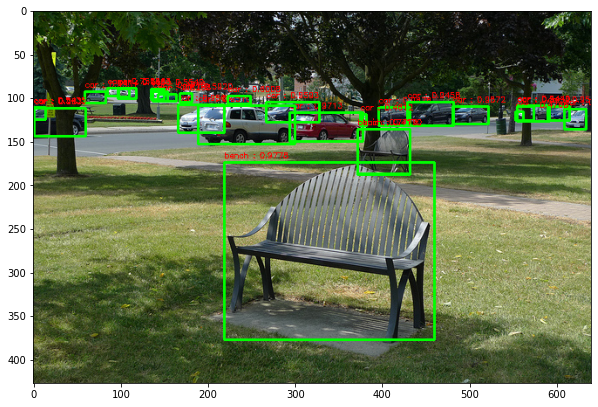

In [78]:
img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
detected_img = get_detected_img(model, img_arr, score_threshold=0.3, is_print=True)
detected_img_rgb = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(detected_img_rgb)
plt.show()

In [79]:
# 비틀즈 데이터도 추가
!mkdir data

!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!ls -lia /content/data/beatles01.jpg

--2021-07-05 14:54:39--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2021-07-05 14:54:39 (19.7 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]

2249433 -rw-r--r-- 1 root root 383118 Jul  5 14:54 /content/data/beatles01.jpg


/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


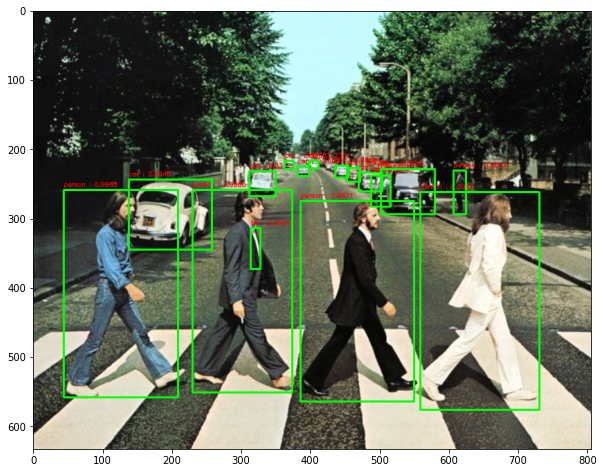

In [82]:
img_arr = cv2.imread('/content/data/beatles01.jpg')
detected_img = get_detected_img(model, img_arr, score_threshold=0.5, is_print=False)
# detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환 
detected_img_rgb = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(detected_img_rgb)
plt.show()